In [1]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

**Product: a new marketplace selling goods from Brazil.**

**Problem: the marketplace's revenue has been stagnant for several months.**

**Task: understand the possible cause and provide recommendations for improving product metrics.**

## Conclusions about the work done for a marketplace offering new products from Brazil ##

- **Product problem:** Revenue has not grown for several months, despite the product's presence on the market.
- **Our task as analysts:** Find the reasons for the stagnation and suggest ways to grow product metrics without compromising the customer experience.


- **Conclusions from point 1, Calculating retention based on cohort analysis:**

The analysis showed that user retention after the first month is only 0.35%, and by the third month — 0.58%. This indicates that repeat orders are almost non-existent, the marketplace does not form a habit of use, and the product does not yet solve the customer's problem on a permanent basis.

- **Conclusions from point 2, Product/Market Fit (PMF) analysis:**

There is no PMF. Users do not return to the product starting from the first month after purchase.

Possible reasons:
- the one-time nature of the purchases themselves;
- lack of value for the customer;
- delays in the delivery of goods.

Recommendations:
- Activate loyalty programmes, introduce cashbacks and promo codes for subsequent purchases;
- Improve the first experience of interaction (delivery, support, feedback);
- If the problem lies with the product, then it needs to be redesigned, focus should be shifted to other product categories, and accessories should be sold alongside expensive products.


- **Conclusions from point 3, Identify 5 key metrics to focus on to maximise company profits:**

The 5 metrics we suggest:

- GMV (Gross Merchandise Value) — sales growth.

Current situation: As noted by the product manager, GMV plateaued in 2018 and stopped growing, which may indicate a lack of repeat orders.

- MAU (monthly active users) — active customers who place orders.

Current situation: growth has stalled since the end of 2017 — the product is no longer attracting new users in greater numbers than before. The product retains the attention of only a limited number of new users per month.

- Median time to first purchase, or conversion of new users to paying users — new customers' interest in the product.

Current situation: With the exception of the spike in October 2016, orders are placed within 12-30 minutes after the first touch, so the first experience with the product is generally good and is not a reason for low retention.

- Retention Rate — customer engagement in continuing to use the product.

Current situation: There are almost no repeat purchases; most customers make a single purchase, as we have already shown in the retention calculation. 

- ARPPU — average revenue per active user.

Current situation: ARPPU remains fairly stable, but there is no growth.


- **Conclusions from section 4, Selecting a hypothesis using the ICE framework:**

To improve key product metrics, a series of hypotheses were reviewed and prioritised using the ICE framework. It was decided to focus on hypothesis 1: If we fix the bug in the order processing system, customers will not have to deal with order cancellations, which will increase the number of orders delivered. We believe that this will eliminate all cancellations. This hypothesis had the highest ICE. Therefore, we recommend checking and fixing errors in the payment and delivery process, as well as monitoring the cancellation rate over time.


- **Conclusions from section 5, Formulation of metrics that may be affected by the hypothesis:**

The following metrics were proposed to test hypothesis 1: target — percentage of orders delivered, proxy — percentage of customers with repeat purchases and support costs, as well as guardrail metrics — percentage of returns and average order processing time.

- **General conclusions based on the results of the study:**

Retention is less than one percent in the first month, which indicates a lack of customer retention;

The product has not reached PMF: user behaviour indicates low product value for the customer and low customer engagement;

Metrics have plateaued due to a lack of repeat sales and low loyalty.

There is a foundation for growth by analysing the behaviour of active customers, improving first interactions and delivery speed, and fixing bugs in the product.


- **Product recommendations:**


1. Improve repeat sales:


- Loyalty programmes;
- Personalised mailings;
- Cashback for repeat purchases;
- Referral programmes.


2. Improve the customer experience with the product:


- Improve delivery quality and speed;
- Work with feedback and support;


3. Experiments:


- A/B testing at the first order stage;
- Segment active customers;
- Test changes to the product range, prices, and offers.

In [2]:
# import the data

In [3]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-margarita-artemova-d71f1/Product_Analytics/olist_customers_dataset.csv')

In [4]:
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-margarita-artemova-d71f1/Product_Analytics/olist_orders_dataset.csv')

In [5]:
items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-margarita-artemova-d71f1/Product_Analytics/olist_order_items_dataset.csv')

In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
customers.shape

(99441, 5)

In [10]:
orders.shape

(99441, 8)

In [11]:
# check if there are any na's
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
#merging the data
customer_order = pd.merge(customers, orders, on = 'customer_id', how = 'inner')
customer_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [13]:
#check data types
customer_order.dtypes

customer_id                      object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
order_id                         object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [14]:
# change tha data format
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date']

customer_order[date_columns] = customer_order[date_columns].apply(pd.to_datetime)

In [15]:
customer_order.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

## **Task 1: Evaluate monthly retention in order placement using cohort analysis**

By order processing, I mean the entire order cycle: from creation to delivery and payment. Therefore, I look at orders that have already been delivered and confirmed as paid.

In real life, it is advisable to ask the product manager/customer what data they are interested in.

In [16]:
# Let's see what the order statuses are for empty order payment confirmation dates
# Interestingly, 14 orders with unconfirmed payment have the status ‘delivered’.
# This may be because some customers paid for their orders after receiving them, 
# or because employees confirm orders manually and have not yet done so for 14 orders.

customer_order[customer_order['order_approved_at'].isna()].groupby('order_status', as_index = False)\
    .agg({'customer_unique_id': 'count'})

,order_status,customer_unique_id
0,canceled,141
1,created,5
2,delivered,14


In [17]:
# Data preparation: clean up rows with missing order_approved_at dates
# (this way, we get rid of unpaid orders)

customer_order_clean = customer_order.dropna(subset=['order_approved_at'])

In [18]:
# Let's see what the status of confirmed orders was
customer_order_clean.groupby('order_status', as_index = False).agg({'customer_unique_id': 'count'})

,order_status,customer_unique_id
0,approved,2
1,canceled,484
2,delivered,96464
3,invoiced,314
4,processing,301
5,shipped,1107
6,unavailable,609


In [19]:
# filter by delivered orders
customer_order_clean = customer_order_clean.query("order_status == 'delivered'")

In [20]:
# Extract the month and day of the order
customer_order_clean['order_month'] = customer_order_clean['order_approved_at'].dt.to_period('M')
customer_order_clean['order_day'] = customer_order_clean['order_approved_at'].dt.to_period('D')

In [21]:
# Assign cohorts based on the date of the first action for each user
customer_order_clean['cohort_month'] = customer_order_clean.groupby('customer_unique_id')['order_approved_at']\
    .transform('min').dt.to_period('M')
customer_order_clean['cohort_day'] = customer_order_clean.groupby('customer_unique_id')['order_approved_at']\
    .transform('min').dt.to_period('D')

In [22]:
# Calculate the number of days in the period (monthly periods, divided by 30)
customer_order_clean['period_number_month'] = np.floor((customer_order_clean.order_day - customer_order_clean.cohort_day)\
                                                       .apply(attrgetter('n')) / 30)

In [23]:
customer_order_clean.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,order_day,cohort_month,cohort_day,period_number_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017-05-16,2017-05,2017-05-16,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018-01-12,2018-01,2018-01-12,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018-05-20,2018-05,2018-05-20,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018-03-13,2018-03,2018-03-13,0.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018-07-29,2018-07,2018-07-29,0.0


In [24]:
# Aggregate data by cohorts and calculated period number (in months)
df_cohort = customer_order_clean.groupby(['cohort_month', 'period_number_month'])\
        .agg(n_customers=('customer_unique_id', 'nunique')).reset_index()

In [25]:
df_cohort.head()

,cohort_month,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [26]:
# Creating a summary table for cohort analysis
cohort_pivot = df_cohort.pivot_table(index='cohort_month', columns='period_number_month', values='n_customers')

In [27]:
cohort_pivot.head()

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort_month,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,683.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1612.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,1.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN


In [28]:
# Calculating cohort sizes
cohort_size = cohort_pivot.iloc[:, 0]

In [29]:
# Calculate retention rates by dividing by cohort size
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [30]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort_month,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002928,NaN,0.005857,0.001464,0.001464,0.002928,0.002928,NaN,NaN,...,0.005857,0.004392,0.002928,NaN,0.002928,0.002928,0.002928,0.001464,NaN,NaN
2017-02,1.0,0.001241,0.001861,0.003722,0.002481,0.001241,0.002481,0.000620,0.000620,0.002481,...,0.003722,0.000620,0.001861,0.001241,0.000620,0.000620,0.001861,NaN,NaN,NaN
2017-03,1.0,0.002788,0.004779,0.004381,0.001195,0.000796,0.003186,0.001991,0.002389,0.002389,...,0.001593,0.001593,0.001195,0.002389,0.001195,0.001195,0.000796,NaN,NaN,NaN
2017-04,1.0,0.003584,0.002688,NaN,0.002688,0.003584,0.002688,0.004480,0.002240,0.002240,...,0.001344,NaN,0.000896,0.000896,0.000896,0.000896,NaN,NaN,NaN,NaN
2017-05,1.0,0.004054,0.004054,0.002606,0.003765,0.003186,0.003186,0.001448,0.003186,0.002606,...,0.002896,0.001738,0.000869,0.002027,0.001158,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004271,0.004928,0.003614,0.001643,0.005256,0.002628,0.001971,0.001314,0.002957,...,0.003285,0.000986,0.002957,0.001314,NaN,NaN,NaN,NaN,NaN,NaN


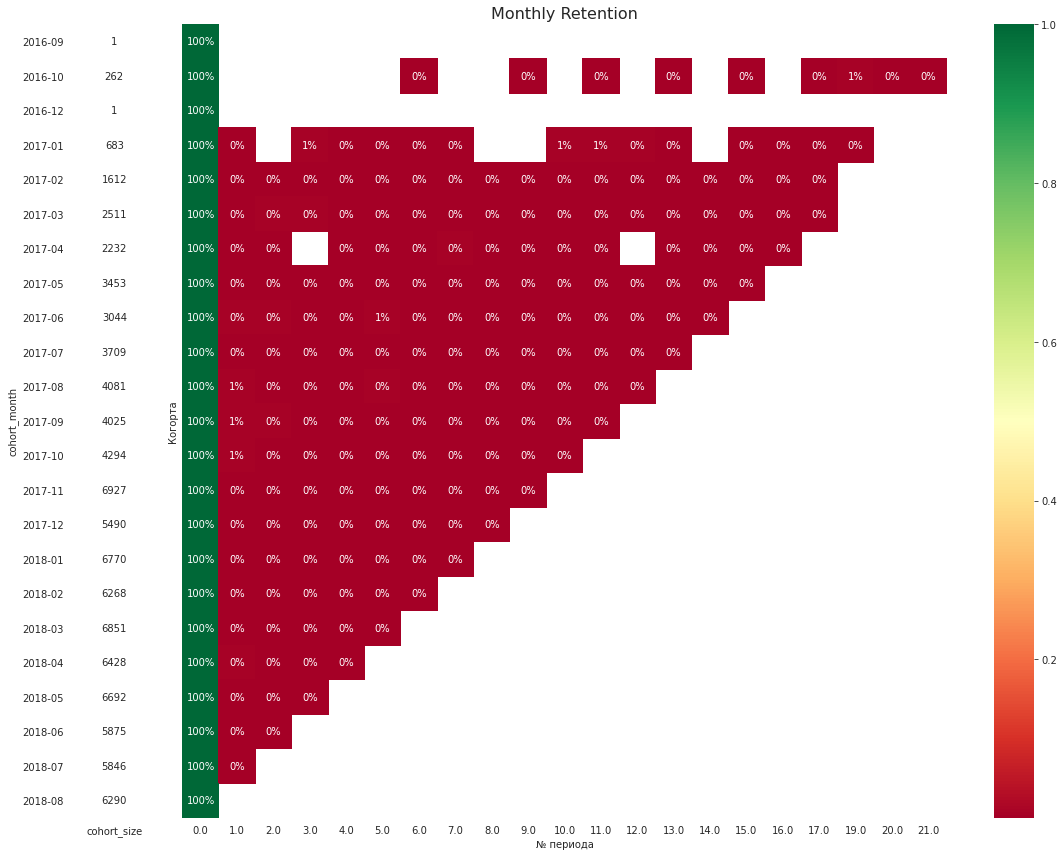

In [31]:
# Building a heat map for cohort analysis
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

In [32]:
# Remove missing data and extract retention values for the first month (cohort_month = 1)
month_1_retention = retention_matrix[1].dropna()

# Count median
median_month_1_retention = month_1_retention.median()

median_month_1_retention

0.00350498786734969

In [33]:
# Remove missing data and extract retention for the 3rd month (cohort_month = 3)
month_3_retention = retention_matrix[3].dropna()

# Find the cohort with the maximum value
max_retention_value = month_3_retention.max()
max_retention_cohort = month_3_retention.idxmax()

max_retention_cohort, max_retention_value

(Period('2017-01', 'M'), 0.005856515373352855)

## **Task 2. Determine whether the marketplace has product/market fit**

**Conclusion: Product/Market Fit (PMF) is missing**

**Possible reason for the lack of PMF:**

- Low engagement after initial contact. Retention for the first month is 0.36%, maximum retention for 3 months is 0.55%. As the retention curve shows, customer return rate drops to zero after the first month and remains at the same level after several months. Thus, the marketplace does not encourage users to return, and users do not choose it to solve their problems on a regular basis.

**Possible reasons for low retention:**

- One-time purchases: the marketplace probably sells products that do not require frequent repetition (more information about price units is needed).
- No benefit for the customer: users do not see a compelling reason to return (insufficient product range, service, or price).

**What to focus on (recommendations)**

Actively work on repeat orders:
- Email/SMS newsletters;
- Loyalty programmes, personalised offers, cashback on second purchases;

Improve the quality of the first-time experience:
- Delivery speed (although on average delivery is faster than expected, 8% of customers experience delivery delays);
- Work with customer reviews and support requests.

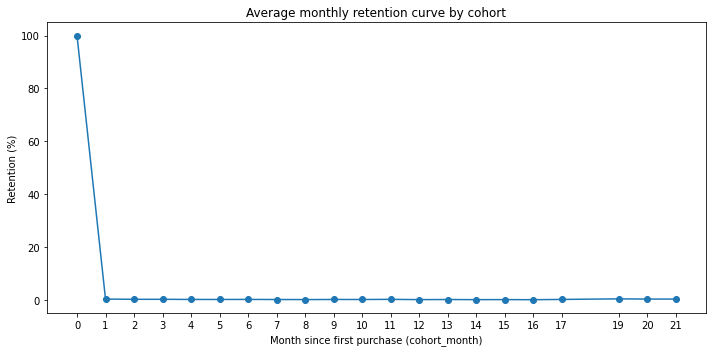

In [81]:
# retention plot

retention_plot = retention_matrix.mean(axis=0) * 100

plt.figure(figsize=(10, 5))
plt.plot(retention_plot.index, retention_plot.values, marker='o')
plt.title('Average monthly retention curve by cohort')
plt.xlabel('Month since first purchase (cohort_month)')
plt.ylabel('Retention (%)')
plt.grid(False)
plt.xticks(retention_plot.index)
plt.tight_layout()
plt.show()

Let's look at the possible reasons for low retention and, as a result, the lack of PMF

In [35]:
# let's look at the average delivery time

orders_items = orders.merge(items, on='order_id')
orders_items = orders_items.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])
orders_items[date_columns] = orders_items[date_columns].apply(pd.to_datetime)
orders_items['delivered_vs_estimate'] = (orders_items['order_delivered_customer_date'] - orders_items['order_estimated_delivery_date']).dt.days

In [36]:
# On average, delivery was earlier than expected, which is unlikely to be the reason for low retention
# orders_items.delivered_vs_estimate.max()
# orders_items.delivered_vs_estimate.min()

orders_items.delivered_vs_estimate.mean()

-12.030200733238956

In [37]:
# Let's see how many delivery delays there were: 8% is already a potential risk for customer satisfaction

delayed = orders_items[orders_items['delivered_vs_estimate'] > 0].shape[0]
delivered_all = orders_items[orders_items["order_status"] == "delivered"].order_id.nunique()
delayed_percentage = delayed / delivered_all * 100
delayed_percentage

7.530838602674407

In [38]:
# Let's look at the availability of goods for customers
# Unfortunately, there is no information about the units of measurement
# If the price is indicated in dollars, the average price of goods at $120 may indicate that the product is expensive
# which, in turn, may be the reason for one-time purchases

price_summary = orders_items['price'].describe()
price_summary

count    110196.000000
mean        119.976180
std         182.299915
min           0.850000
25%          39.900000
50%          74.900000
75%         134.170000
max        6735.000000
Name: price, dtype: float64

In [39]:
# Let's see how order cancellations could have affected low retention

orders_items['order_status'].value_counts()

delivered    110189
canceled          7
Name: order_status, dtype: int64

In [40]:
# Approximately 2% are cancelled orders, orders being processed and other orders that have not yet been delivered
# Thus, cancellations are not a key reason for low returns

delivered_all = orders_items[orders_items["order_status"] == "delivered"].order_id.nunique()
all_orders = orders_items.order_id.nunique()
100 - delivered_all / all_orders * 100

0.006219163315222431

## **Task 3. Identify 5 key metrics that the product can focus on to maximise the company's profits**

- The first metric should reflect the growth in marketplace sales volume.
- The second should show the audience size to which the product delivers value.
- The third should reflect new customers' interest in the product.
- The fourth should reflect customer engagement in continuing to use the product.
- The fifth should reflect the monetary value of customer engagement.

**Metric 1: GMV (Gross Merchandise Value).**

This metric is a financial metric because it measures the economic efficiency of a business and reflects the total sales of a marketplace over a specific period of time (in our case, per month).

In [41]:
#create a column with the month of order payment confirmation and combine all three data frames
customer_order = customer_order.dropna(subset=['order_approved_at']) # get rid of cancelled orders
customer_order['order_month'] = customer_order['order_approved_at'].dt.to_period('M')
orders_full = pd.merge(customer_order, items, on='order_id', how='inner')

In [42]:
orders_full.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [43]:
# Count GMV
gmv = orders_full.groupby('order_month').agg({'price' : 'sum'})
gmv

,price
order_month,
2016-09,134.97
2016-10,49640.05
2016-12,10.90
2017-01,114860.71
2017-02,247441.08
2017-03,370611.56
2017-04,357638.73
2017-05,507167.89
2017-06,437278.58


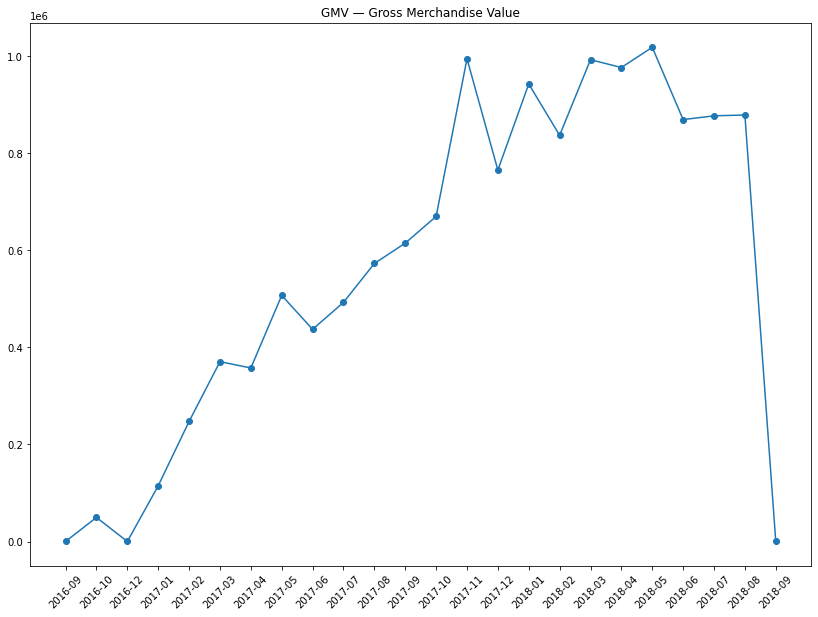

In [44]:
plt.figure(figsize=(14, 10))
plt.plot(gmv.index.astype(str), gmv.values, marker='o')
plt.title('GMV — Gross Merchandise Value')
plt.xticks(rotation=45)
plt.grid(False)

**Metric 2: MAU (number of unique users placing orders per month).**

This metric is a customer operations metric because it shows how customers interact with the product.

In [45]:
# Count MAU
mau = customer_order.groupby('order_month').agg({'customer_unique_id' : 'nunique'})
mau

,customer_unique_id
order_month,
2016-09,1
2016-10,317
2016-12,1
2017-01,727
2017-02,1740
2017-03,2649
2017-04,2342
2017-05,3621
2017-06,3189


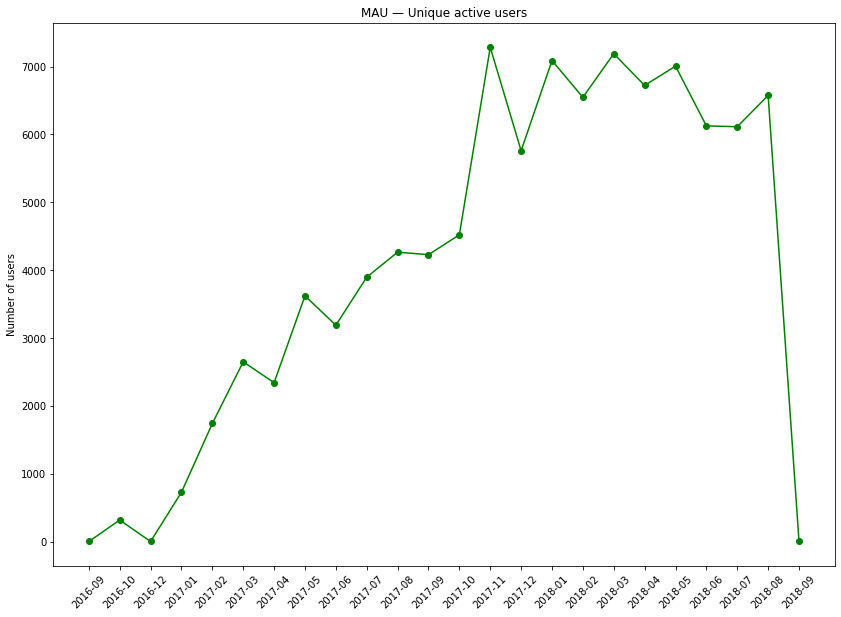

In [46]:
plt.figure(figsize=(14, 10))
plt.plot(mau.index.astype(str), mau.values, marker='o', color='green')
plt.title('MAU — Unique active users')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.grid(False)

**Metric 3: Median time to first order confirmation**

This metric is a product metric because it shows the product's ability to attract new users. The metric shows how much time passes between the creation and payment of the first order.

**Alternative metric: conversion of new users to buyers**

In [47]:
# Calculation of time from order creation to order confirmation
customer_order['decision_time'] = (customer_order['order_approved_at'] - customer_order['order_purchase_timestamp'])\
     .dt.total_seconds() / 3600 # in hours

# Let's only keep the first orders from customers
first_orders = customer_order.sort_values(by='order_approved_at').drop_duplicates(subset='customer_unique_id', keep='first')

# Group order confirmation times by the month of the first order
first_orders['order_month'] = first_orders['order_approved_at'].dt.to_period('M')
decision_time_by_month = first_orders.groupby('order_month')['decision_time'].median()

In [48]:
decision_time_by_month
# In October 2016, there is a clear anomaly in the order payment confirmation time. 
# Either the order payment confirmation time is incorrect, or there was a platform failure,
# or customers paid upon receipt of the order.

order_month
2016-09     0.000000
2016-10    14.104722
2016-12     0.247222
2017-01     0.259444
2017-02     0.226389
2017-03     0.129722
2017-04     0.238333
2017-05     0.239167
2017-06     0.251111
2017-07     0.252222
2017-08     0.324722
2017-09     0.269306
2017-10     0.315278
2017-11     0.389444
2017-12     0.366806
2018-01     0.317500
2018-02     0.364167
2018-03     0.344861
2018-04     0.433889
2018-05     0.469167
2018-06     0.442778
2018-07     0.490972
2018-08     0.287500
Freq: M, Name: decision_time, dtype: float64

**Metric 4: Number of customers who placed more than one order per month.**

This metric is a product metric that shows customer engagement.

In [49]:
repeat_orders = customer_order.groupby(['customer_unique_id', 'order_month'], as_index = False).agg({'order_id' : 'count'})
repeat_orders = repeat_orders[repeat_orders['order_id'] > 1]
retention_activity = repeat_orders.groupby('order_month').agg({'customer_unique_id' : 'nunique'})

In [50]:
retention_activity

,customer_unique_id
order_month,
2016-10,3
2017-01,24
2017-02,22
2017-03,39
2017-04,28
2017-05,70
2017-06,62
2017-07,75
2017-08,77


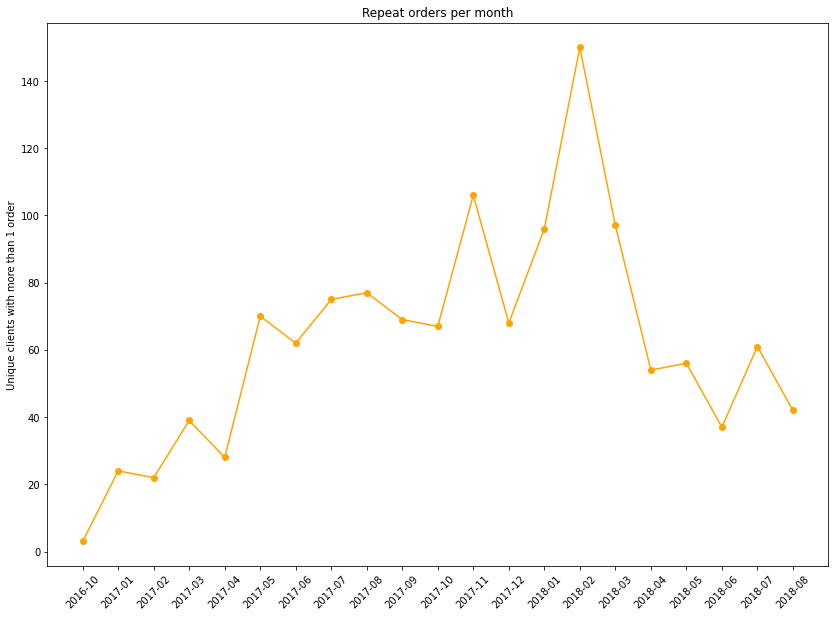

In [51]:
plt.figure(figsize=(14, 10))
plt.plot(retention_activity.index.astype(str), retention_activity.values, marker='o', color='orange')
plt.title('Repeat orders per month')
plt.ylabel('Unique clients with more than 1 order')
plt.xticks(rotation=45)
plt.grid(False)

**Metric 5: ARPPU (Average Revenue per Paying User) — average revenue per active user.**

Financial metric.

In [52]:
# Calculate ARPPU by dividing the total monthly revenue of the marketplace by the number of unique users per month.
order_merded = pd.merge(gmv, mau, on = 'order_month', how = 'left')
order_merded.rename(columns={"price": "gmv", 'customer_unique_id' : 'mau'}, inplace=True)

arppu = order_merded.gmv / order_merded.mau
arppu

order_month
2016-09    134.970000
2016-10    156.593218
2016-12     10.900000
2017-01    157.992724
2017-02    142.207517
2017-03    139.906214
2017-04    152.706546
2017-05    140.062936
2017-06    137.120909
2017-07    126.479995
2017-08    134.335599
2017-09    145.439891
2017-10    148.173555
2017-11    136.580106
2017-12    132.904924
2018-01    133.007839
2018-02    127.869754
2018-03    138.105994
2018-04    145.321303
2018-05    145.350930
2018-06    141.939314
2018-07    143.485929
2018-08    133.686256
2018-09    145.000000
Freq: M, dtype: float64

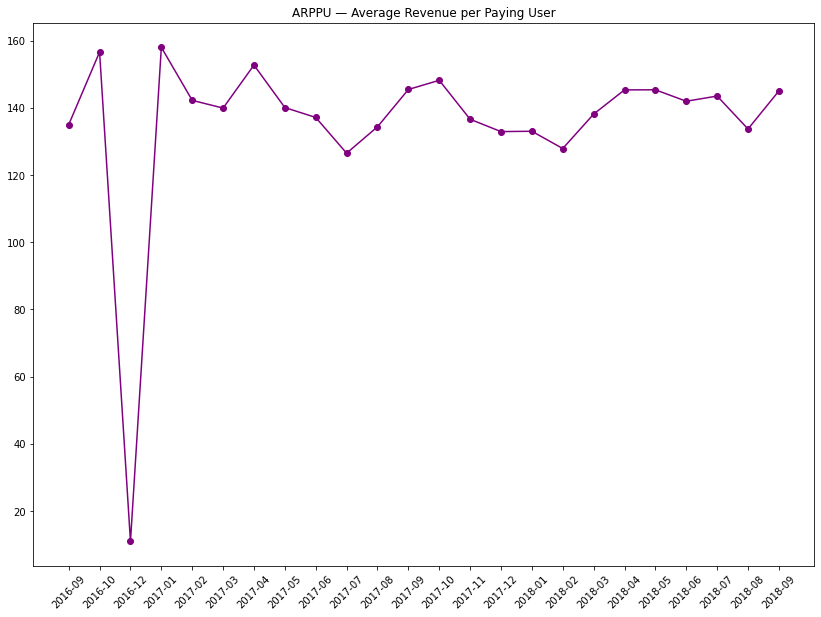

In [82]:
plt.figure(figsize=(14, 10))
plt.plot(arppu.index.astype(str), arppu.values, marker='o', color='purple')
plt.title('ARPPU — Average Revenue per Paying User')
plt.xticks(rotation=45)
plt.grid(False)

## Task 4. Select one of the three main hypotheses using the ICE framework.##

**Hypothesis 1:** If we fix the bug in the order processing system, customers will not have to deal with order cancellations, which will increase the number of orders delivered. We believe that this will eliminate all cancellations.

**Hypothesis 2:** If we reduce the time it takes to ship orders, customers will no longer receive their orders late, which will increase the number of orders due to repeat orders.

**Hypothesis 3:** If we create a new payment method that will convert customers into repeat orders, customers will not experience difficulties when placing orders, which will increase the number of orders due to repeat orders.

**Conclusion:** Hypothesis 1 receives the highest priority according to the ICE framework.

In [54]:
median_month_1_retention # CR in repeated order

0.00350498786734969

In [55]:
# Count ICE by Hypothesis 1

In [56]:
orders[date_columns] = customer_order[date_columns].apply(pd.to_datetime)
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [57]:
# Data pre-processing: filtering the dataset by orders placed after 1 June 2017
filtered_orders = orders[orders["order_purchase_timestamp"] >= "2017-06-01"]

In [58]:
# Let's see how many orders there have been since June 2017, how many of them were delivered, and how many were cancelled.
total_orders = filtered_orders["order_id"].nunique()
delivered_orders = filtered_orders[filtered_orders["order_status"] == "delivered"]["order_id"].nunique()
canceled_orders_only = filtered_orders[filtered_orders["order_status"] == "canceled"]["order_id"].nunique()

In [59]:
total_orders

87624

In [60]:
delivered_orders

85013

In [61]:
canceled_orders_only

549

In [62]:
# Looking at the impact table, the match with 549 is 4.
impact1 = 4

In [63]:
ICE1 = impact1 * 8 * 6
ICE1

192

Alternatively, we can also take repeat orders as impact, since we use this indicator in the other two hypotheses. In this case, the potential impact will be 299, the recalculated impact on the scale will be 3, and the total ICE will be 144, which is still the best indicator of all three hypotheses.

In [64]:
# Thus, when fixing the bug, we will be able to get rid of 549 cancellations. If they are all converted to orders, we will get:
potential_uplift = delivered_orders + canceled_orders_only
potential_uplift

85562

In [65]:
potential_impact = potential_uplift * median_month_1_retention
potential_impact_scaled = 3
possible_ICE = 3*8*6

potential_impact, potential_impact_scaled, possible_ICE

(299.8937719061742, 3, 144)

In [66]:
# Calculating ICE according to hypothesis 2

In [67]:
delivered_df = filtered_orders[filtered_orders["order_status"] == "delivered"]
delivered_df.shape

(85013, 8)

In [68]:
# scanning for na's
filtered_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1230
order_delivered_customer_date    2217
order_estimated_delivery_date       0
dtype: int64

In [69]:
# Remove rows with missing values in the required fields
delivered_df = delivered_df.dropna(
    subset=["order_delivered_customer_date", "order_estimated_delivery_date", "order_delivered_carrier_date"])

In [70]:
# Calculate how much would have been delivered and how much was expected if we reduced the shipping time.
delivered_df["actual_shipping_duration"] = (
    delivered_df["order_delivered_customer_date"] - delivered_df["order_delivered_carrier_date"]
).dt.days

delivered_df["expected_shipping_duration"] = (
    delivered_df["order_estimated_delivery_date"] - delivered_df["order_delivered_carrier_date"]
).dt.days

# Orders where actual delivery took longer than expected (delay excluding shipment)
delays_due_to_shipping = delivered_df[
    delivered_df["actual_shipping_duration"] > delivered_df["expected_shipping_duration"]
]

# Calculation of the number of delayed orders without taking into account the shipping time
shipping_delay_count = delays_due_to_shipping["order_id"].nunique()

# total orders delivered
delivered_count = delivered_df["order_id"].nunique()

In [71]:
# Delivery speeds can potentially be increased by 8%.
shipping_delay_count / delivered_count * 100

7.924592063338805

In [72]:
# potential number of customers who received their order on time and placed a repeat order:
absolute_uplift = (delivered_count - shipping_delay_count) * median_month_1_retention
absolute_uplift

267.39552440010783

In [73]:
# Looking at the impact table, the match with 267 is 3.
impact2 = 3

In [74]:
ICE2 = impact2 * 10 * 4
ICE2

120

In [75]:
# Calculate ICE based on hypothesis 3

In [76]:
# check filtering to ensure that nothing has been lost in the previous steps
filtered_orders.sort_values('order_purchase_timestamp', ascending = True).head(5)  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
95276,a91402873e20638661e1df60e8eb63dd,84fb94e88cc2e3e090d76e95dd6236d5,delivered,2017-06-01 00:05:38,2017-06-02 01:05:30,2017-06-02 10:31:40,2017-06-08 13:03:51,2017-06-28
78889,e1e0cfc8398a7bcd9699fe42c1651566,2e28b1a46d27d698ecb5253364df051b,delivered,2017-06-01 00:12:32,2017-06-02 04:33:02,2017-06-08 07:33:39,2017-06-19 12:18:53,2017-07-12
47395,f5e9edb4041a4f6ddaac3851ae7992ee,04da2645a56f541526058058e48a71e1,delivered,2017-06-01 00:13:42,2017-06-01 01:22:30,2017-06-02 11:26:20,2017-06-06 13:16:42,2017-06-28
50514,76098ff18bad7555c2d85340e82b8941,edc3794d476fd4688e606229f4be94dd,delivered,2017-06-01 00:39:20,2017-06-01 01:35:20,2017-06-05 12:49:51,2017-06-19 14:51:50,2017-06-28
37784,df6b7e4d84d400a45f67fb12a8b2881d,bb79eb4829cd191cdc2664df115f357d,delivered,2017-06-01 00:41:00,2017-06-01 01:35:20,2017-06-01 15:26:17,2017-06-08 13:50:14,2017-06-23


In [77]:
# merging the data
filtered_orders = pd.merge(filtered_orders, customers, on="customer_id", how="left")

# unique clients
unique_customers = filtered_orders["customer_unique_id"].nunique()


# expected increase in repeat orders (i.e. all customers, regardless of status, are converted into repeat orders)
expected_additional_orders_from_payment = unique_customers * median_month_1_retention

expected_additional_orders_from_payment

297.90293879751954

In [78]:
# Let's look at the impact table: the match with 297 is 3.
impact3 = 3

In [79]:
ICE3 = impact3 * 5 * 9
ICE3

135

In [80]:
# conclusion - let's focus on hypothesis 1 (although in percentage terms, the number of cancellations is quite small compared to the total number of orders)
ICE = [ICE1, ICE2, ICE3]
max(ICE)
ICE.index(max(ICE))

0

## Task 5. Formulate the necessary metrics that the hypothesis should influence.##

**Subtasks:**

- Formulate metrics that should be affected by your chosen hypothesis.
- Formulate at least one metric in each category: target, proxy, guardrail.

**Proposed metrics:**

1. Target metric: Percentage of orders delivered out of the total number of orders (this is what we initially wanted to influence when eliminating bugs; cancellations are converted to delivered orders)


2. Proxy metric: 
- Percentage of repeat customers out of the total number of customers (order cancellations could have disappointed customers, discouraging them from making repeat purchases; with the bug fixed, this metric should also increase)
- Support team costs (the fewer order cancellations, the fewer support requests for this issue)


3. Barrier metrics:
- Percentage of order returns (as the delivery rate increases, the return rate may also increase)
- Average order processing time (more successful orders increase the load on order processing operators and the logistics system, which may increase the time required from order creation to order receipt)